In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv("E:\\Data Sets\\Churn_Modelling.csv")

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [11]:
df.shape

(10000, 11)

In [12]:
df.duplicated().sum()

0

Exited
0    7963
1    2037
Name: count, dtype: int64

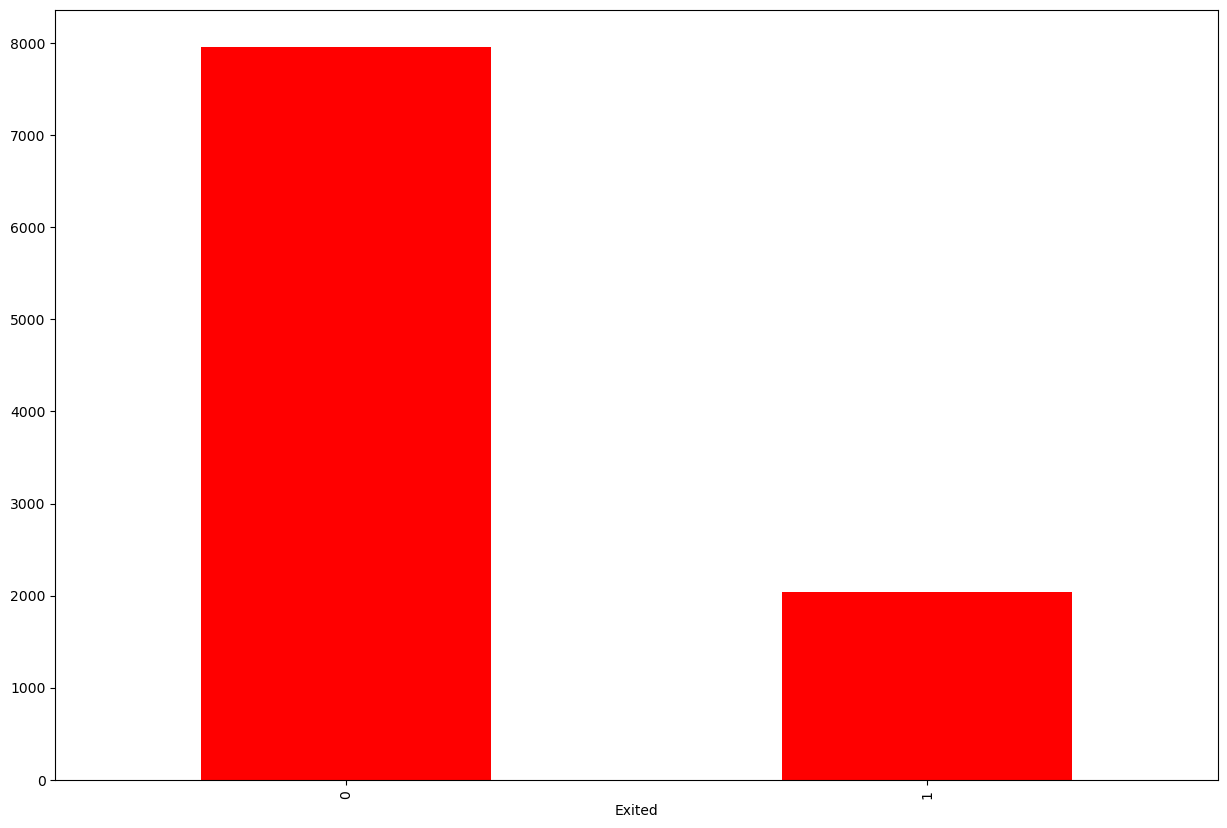

In [13]:
count = df['Exited']
count.value_counts().plot(kind="bar",figsize=(15,10),color='red')
count.value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

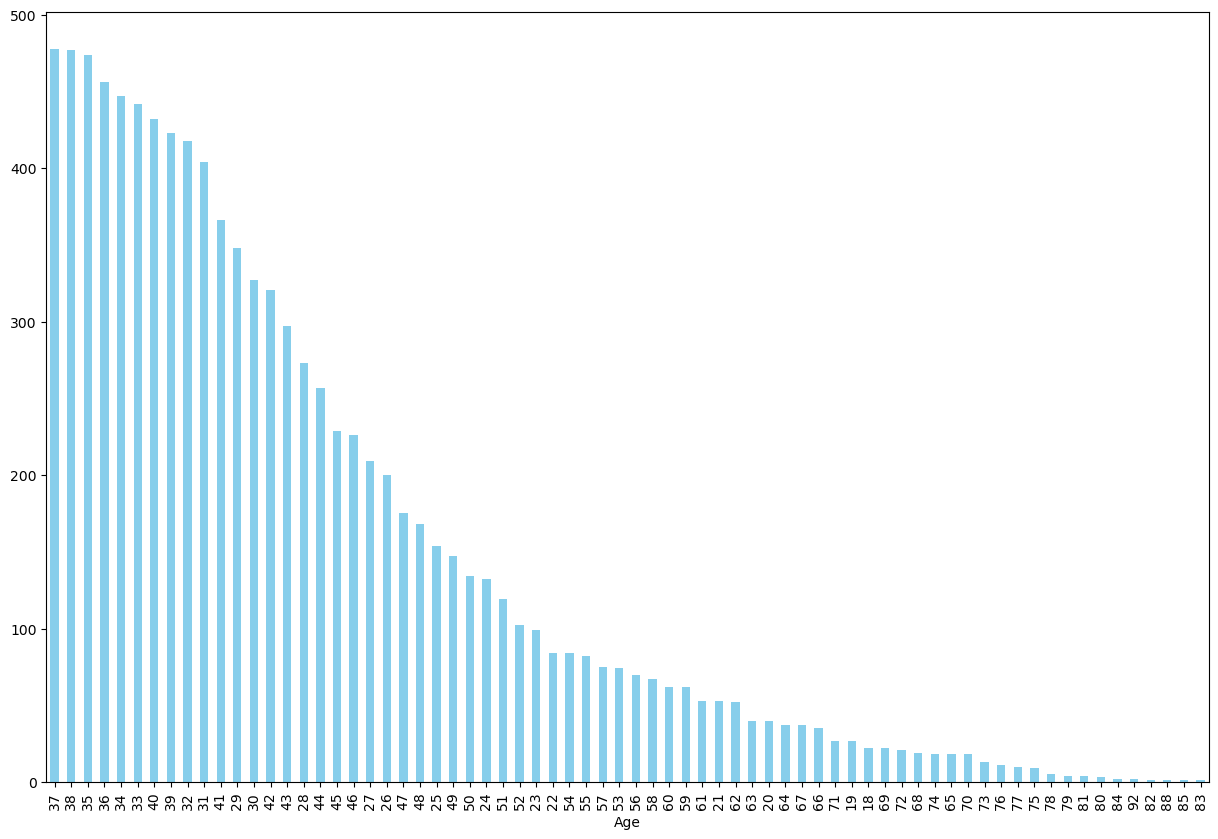

In [14]:
df['Age'].value_counts().plot(kind="bar",figsize=(15,10),color='skyblue')
df['Age'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

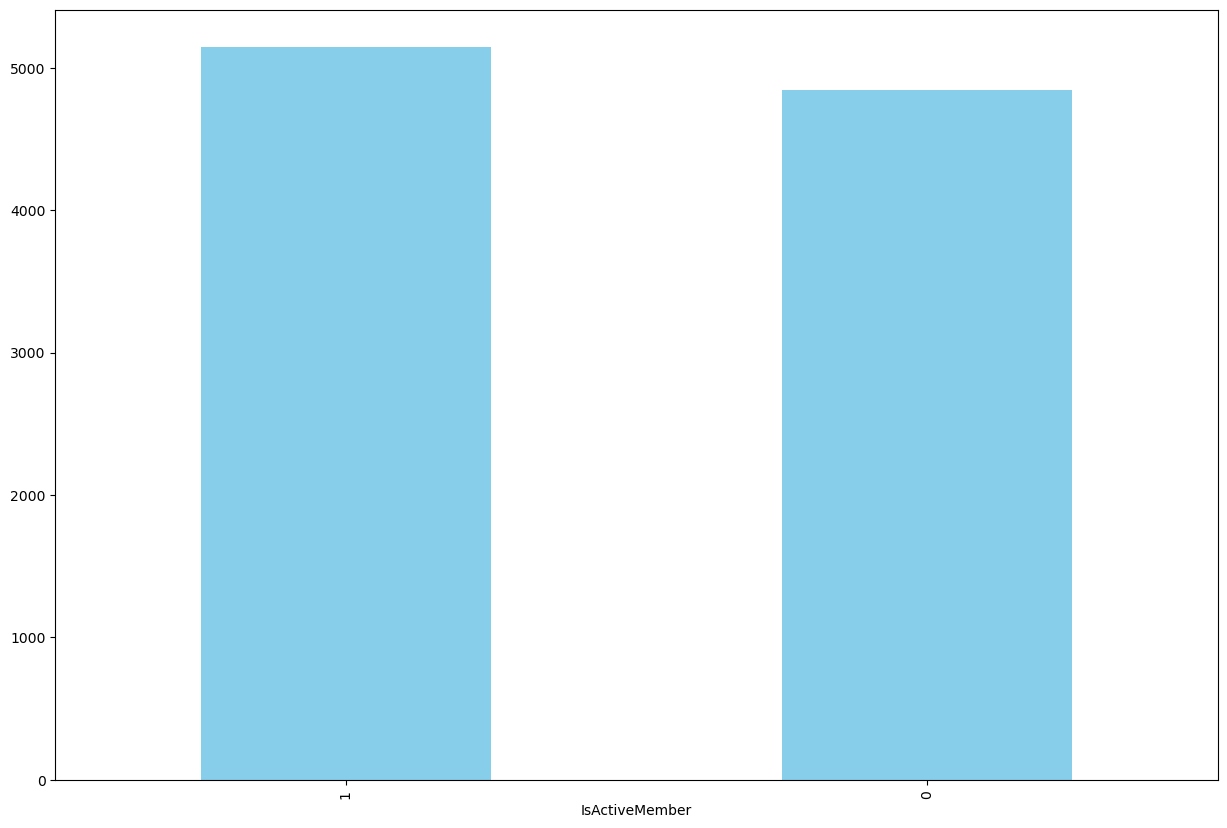

In [15]:
df['IsActiveMember'].value_counts().plot(kind="bar",figsize=(15,10),color='skyblue')
df['IsActiveMember'].value_counts()

In [17]:
label_encoder = LabelEncoder()

In [18]:
columns_to_convert = ['Geography','Gender']
for col in columns_to_convert:
    df[col] = label_encoder.fit_transform(df[col])

In [19]:
columns_to_convert_in_int_to_float = ['CreditScore','Geography','Gender', 'Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember']

In [20]:
for col in columns_to_convert_in_int_to_float:
    df[col] = df[col].astype('float64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  float64
 2   Gender           10000 non-null  float64
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  float64
 7   HasCrCard        10000 non-null  float64
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [22]:
X = df.drop(columns=['Exited'])
Y = df['Exited']

In [24]:
X.shape,Y.shape

((10000, 10), (10000,))

In [26]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [27]:
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
X_train.shape, X_test.shape

((8000, 10), (2000, 10))

In [30]:
Y_train.shape, Y_test.shape

((8000,), (2000,))

In [33]:
lr=LogisticRegression(random_state=42)

In [34]:
lr.fit(X_train,Y_train)

LogisticRegression(random_state=42)

In [36]:
y_predict=lr.predict(X_test)

In [41]:
accuracy =accuracy_score(Y_test,y_predict)

In [43]:
print('accuracy of modeel is :',accuracy) 

accuracy of modeel is : 0.815
